In [ ]:
# auto format code at cell execution
%load_ext lab_black

root_location = "../../"
import sys

sys.path.append(root_location)

import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from src.tools.utils import approx_abs_log
from src.tools.movement import movement

%matplotlib inline

# Parameters

In [2]:
input_file_name = root_location + "data/samples/year_2018.csv"

# Load data

In [3]:
%%time

df = pd.read_csv(input_file_name)

CPU times: user 930 ms, sys: 112 ms, total: 1.04 s
Wall time: 1.05 s


# Analysis

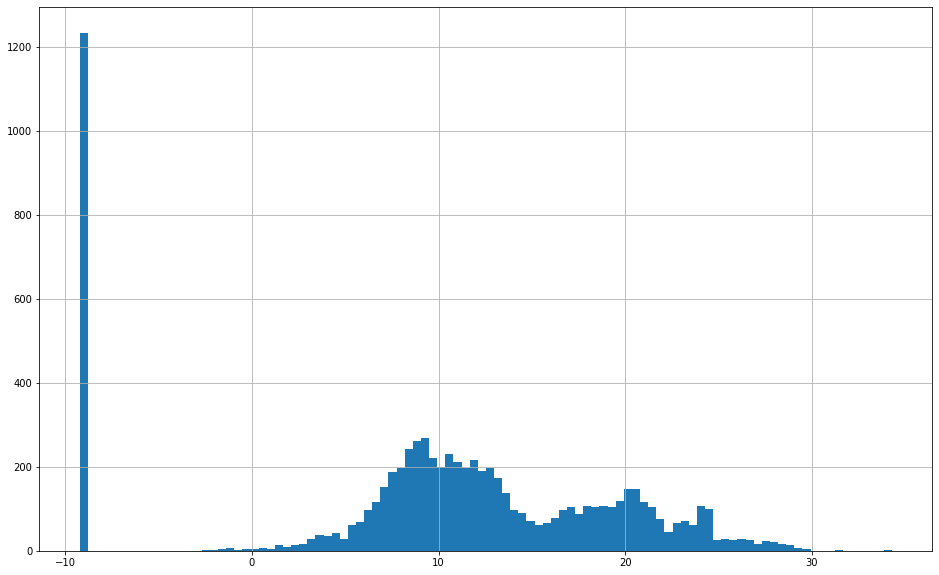

In [4]:
grouped = df.groupby(["year", "month", "day", "hour"]).agg(
    {
        "latitudeE7": ["median", "var", "count"],
        "longitudeE7": ["median", "var", "count"],
    }
)

approx_abs_log(grouped.latitudeE7["var"]).hist(bins=100, figsize=(16, 10))

In [5]:
df["movement"] = movement(df)

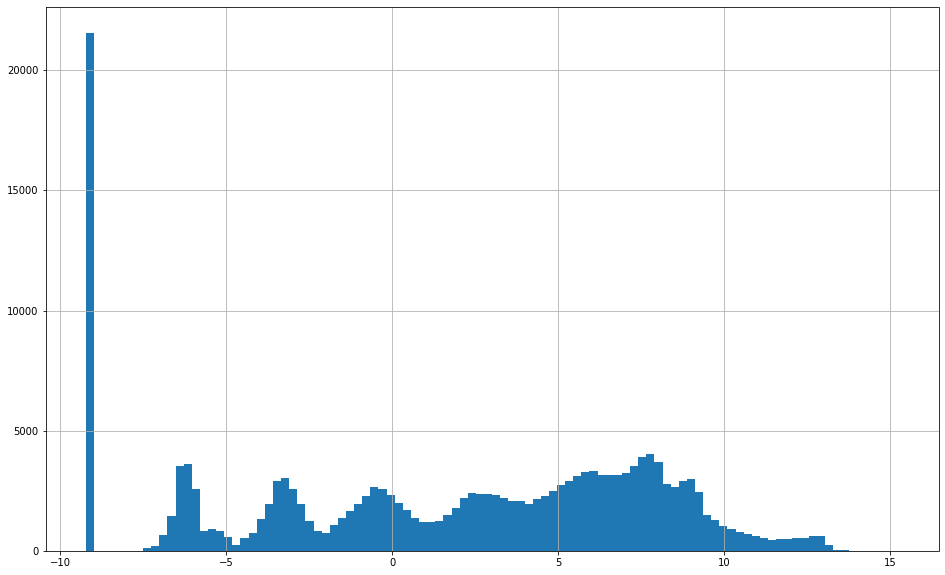

In [6]:
approx_abs_log(df.movement).rolling(5, center=True).mean().hist(
    bins=100, figsize=(16, 10)
)

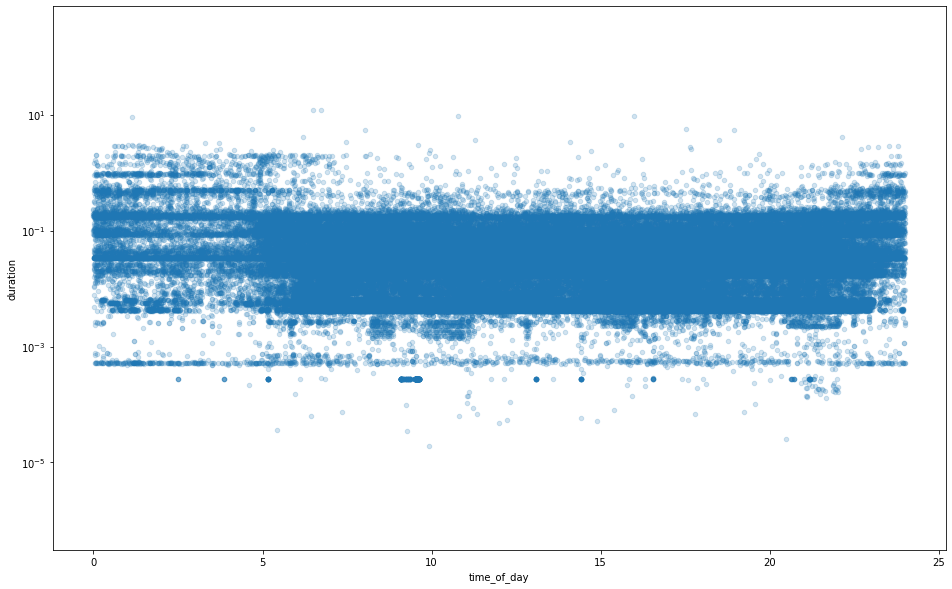

In [7]:
df.plot(
    x="time_of_day",
    y="duration",
    alpha=0.2,
    kind="scatter",
    logy=True,
    figsize=(16, 10),
)